In [25]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt

In [26]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [27]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train shape:  (60000, 784)
60000 train samples
10000 test samples


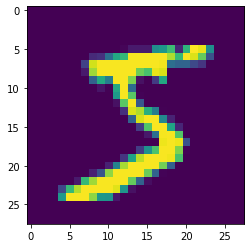

In [28]:
# make suare images have shape (28, 28, 1)
x_train = np.reshape(x_train, (60000, 784))
x_test = np.reshape(x_test, (10000, 784))

print("x_train shape: ", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

a_train_img = x_train[0]
a_train_img = np.reshape(a_train_img, (28, 28))
plt.imshow(a_train_img)

In [29]:
# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [30]:
# Build the model
model = keras.Sequential(
[
      tf.keras.layers.Input(shape=(28*28,)),
      tf.keras.layers.Dense(200, activation='relu'),
      tf.keras.layers.Dense(60, activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 200)               157000    
                                                                 
 dense_7 (Dense)             (None, 60)                12060     
                                                                 
 dense_8 (Dense)             (None, 10)                610       
                                                                 
Total params: 169,670
Trainable params: 169,670
Non-trainable params: 0
_________________________________________________________________


In [31]:
batch_size = 128
epochs = 30

model.compile(
    loss="categorical_crossentropy", 
    optimizer="adam", 
    metrics=["accuracy"])

# Train the model
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

2022-01-25 15:53:01.729362: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 169344000 exceeds 10% of free system memory.


Epoch 1/30
421/422 [============================>.] - ETA: 0s - loss: 0.3308 - accuracy: 0.9065

2022-01-25 15:53:05.612401: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 18816000 exceeds 10% of free system memory.


422/422 [==============================] - 4s 8ms/step - loss: 0.3304 - accuracy: 0.9066 - val_loss: 0.1317 - val_accuracy: 0.9632
Epoch 2/30
422/422 [==============================] - 3s 8ms/step - loss: 0.1306 - accuracy: 0.9610 - val_loss: 0.0935 - val_accuracy: 0.9715
Epoch 3/30
422/422 [==============================] - 3s 8ms/step - loss: 0.0875 - accuracy: 0.9737 - val_loss: 0.0841 - val_accuracy: 0.9755
Epoch 4/30
422/422 [==============================] - 3s 8ms/step - loss: 0.0626 - accuracy: 0.9811 - val_loss: 0.0813 - val_accuracy: 0.9763
Epoch 5/30
422/422 [==============================] - 4s 8ms/step - loss: 0.0481 - accuracy: 0.9853 - val_loss: 0.0802 - val_accuracy: 0.9782
Epoch 6/30
422/422 [==============================] - 3s 7ms/step - loss: 0.0373 - accuracy: 0.9889 - val_loss: 0.0814 - val_accuracy: 0.9782
Epoch 7/30
422/422 [==============================] - 3s 7ms/step - loss: 0.0296 - accuracy: 0.9911 - val_loss: 0.0904 - val_accuracy: 0.9765
Epoch 8/30
422/42

In [32]:
# Evaluate the trained model
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss: ", score[0])
print("Test accuracy: ", score[1])

Test loss:  0.11519116163253784
Test accuracy:  0.9800999760627747


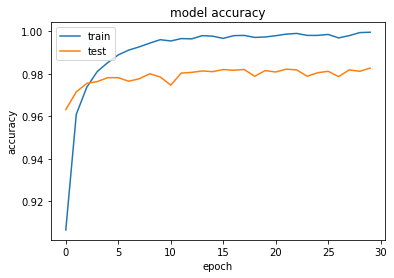

In [33]:
# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

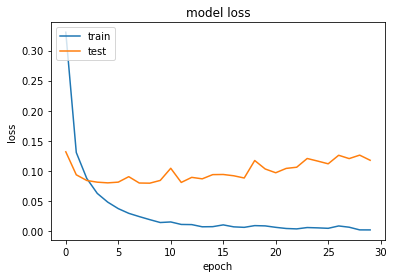

In [34]:
# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [35]:
# save the model to file
model.save('./Data/relu_softmax_model.h5')